<a href="https://colab.research.google.com/github/EricRibeiroAlves/DeteccaoFakeNews/blob/main/Modelos/%5BAP_T%5D_TI_Modelo_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Carregamento dos Dados
dat_fake = "/content/drive/MyDrive/Eng. Controle e Automação/8º Semestre/AP/dataset_FakeNews/Fake.csv"
dat_real = "/content/drive/MyDrive/Eng. Controle e Automação/8º Semestre/AP/dataset_FakeNews/True.csv"

dt_fake = pd.read_csv(dat_fake)
dt_real = pd.read_csv(dat_real)

dt_fake['label'] = 'fake'
dt_real['label'] = 'real'

dt = pd.concat([dt_fake, dt_real], ignore_index=True)
dt = dt[(dt['subject'] == 'News') | (dt['subject'] == 'worldnews')]

# Pré-processamento
df = dt[['title', 'text', 'label']]
df = df.dropna()
df['full_text'] = df['title'] + ' ' + df['text']

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Separar features e labels
X = df['full_text']
y = df['label']

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Criar Pipeline
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1, 2)  # Considerar bigramas
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [50, 100, 150, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Treinamento
grid_search.fit(X_train_tfidf, y_train)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [50, 100, 150, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Melhores Parâmetros:
{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2}
Acurácia: 0.9997
F1-Score: 0.9997
ROC-AUC: 0.9997
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      1810
        real       1.00      1.00      1.00      2029

    accuracy                           1.00      3839
   macro avg       1.00      1.00      1.00      3839
weighted avg       1.00      1.00      1.00      3839



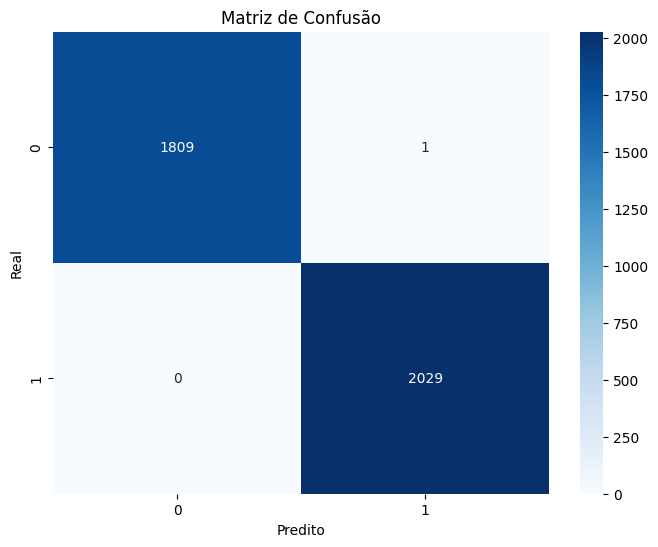

In [50]:
# Melhores parâmetros
print("Melhores Parâmetros:")
print(grid_search.best_params_)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Relatório detalhado
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()